<a href="https://colab.research.google.com/github/treeone246/latihanPCD/blob/main/2051502011111001_GabrielWinastaSinisuka_sourceUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install opencv-python scikit-image pillow matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

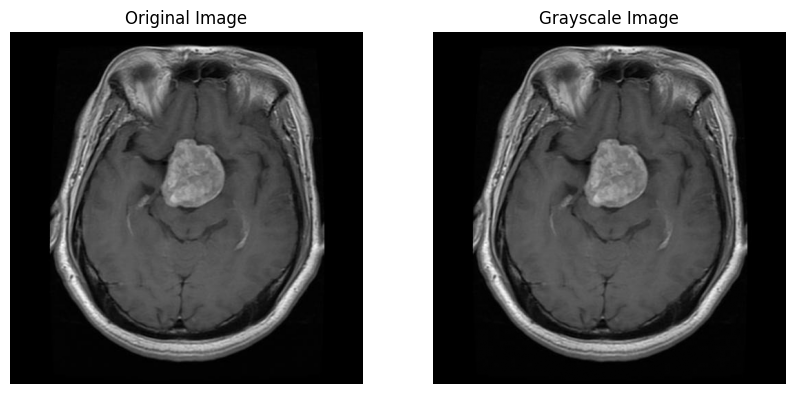

In [4]:
img = cv2.imread('mri.png')

img_rgbMri = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grayMri = cv2.cvtColor(img_rgbMri, cv2.COLOR_RGB2GRAY)


plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img_rgbMri)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayMri, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()



(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

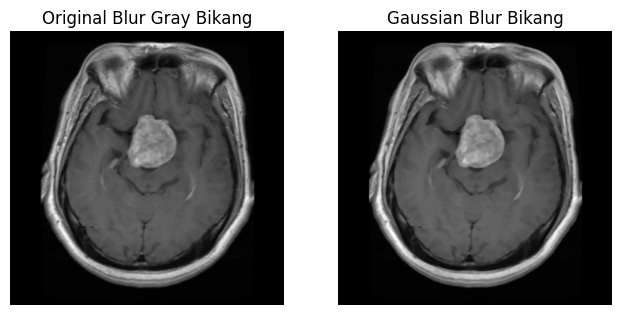

In [16]:
gaussMri = cv2.GaussianBlur(grayMri, (5,5), 0)
medianMri = cv2.medianBlur(grayMri, 5)


plt.figure(figsize=(12,4))
plt.subplot(1,3,1);
plt.imshow(gaussMri, cmap='gray');
plt.title('Original Blur Gray Bikang');
plt.axis('off')

plt.subplot(1,3,2);
plt.imshow(medianMri, cmap='gray');
plt.title('Gaussian Blur Bikang');
plt.axis('off')




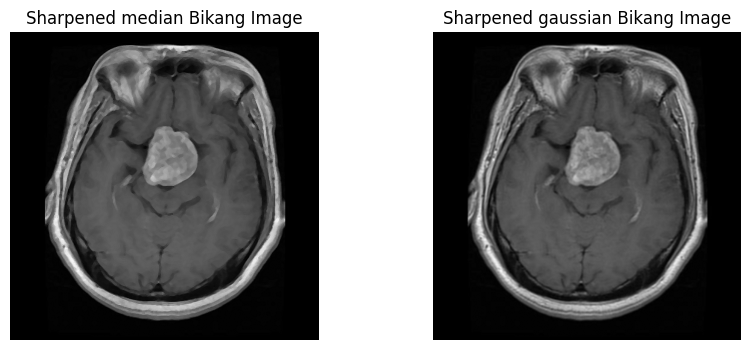

In [17]:
kernel_sharp_basic = np.array([[0,-1,0],
                              [-1,5,-1],
                              [0,-1,0]])

kernel_sharp_mild = np.array([[0, -0.5, 0],
                              [-0.5, 3, -0.5],
                              [0, -0.5, 0]])

kernel_sharp_strong = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])

kernel_sharp_custom = np.array([[1, -2, 1],
                                [-2, 5, -2],
                                [1, -2, 1]])

sharp_medianMri = cv2.filter2D(medianMri, -1, kernel_sharp_mild)
sharp_gaussianMri = cv2.filter2D(gaussMri, -1, kernel_sharp_mild)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sharp_medianMri, cmap='gray')
plt.title("Sharpened median Bikang Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharp_gaussianMri, cmap='gray')
plt.title("Sharpened gaussian Bikang Image")
plt.axis('off')
plt.show()

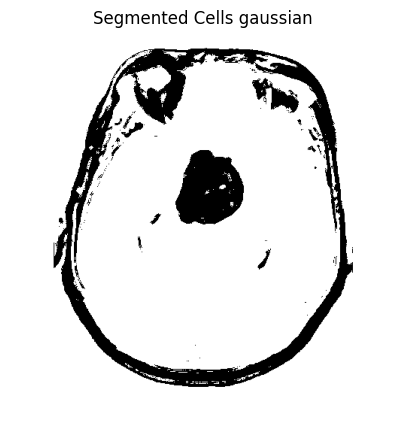

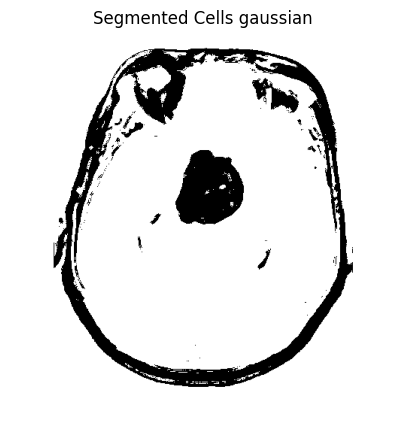

In [39]:
_, th0 = cv2.threshold(sharp_gaussianMri, 155, 255, cv2.THRESH_OTSU)
_, th1 = cv2.threshold(sharp_gaussianMri, 155, 255, cv2.THRESH_OTSU)
_, th0_0 = cv2.threshold(sharp_medianMri, 105, 255, cv2.THRESH_BINARY)
_, th1_1 = cv2.threshold(sharp_medianMri, 105, 255, cv2.THRESH_BINARY)

th_inv0 = cv2.bitwise_not(th0)
th_inv1 = cv2.bitwise_not(th1)

th_inv0_0 = cv2.bitwise_not(th0_0)
th_inv1_1 = cv2.bitwise_not(th1_1)


plt.figure(figsize=(5,5))
plt.imshow(th_inv0_0, cmap='gray')
plt.title("Segmented Cells gaussian")
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(th_inv1_1, cmap='gray')
plt.title("Segmented Cells gaussian")
plt.axis('off')
plt.show()

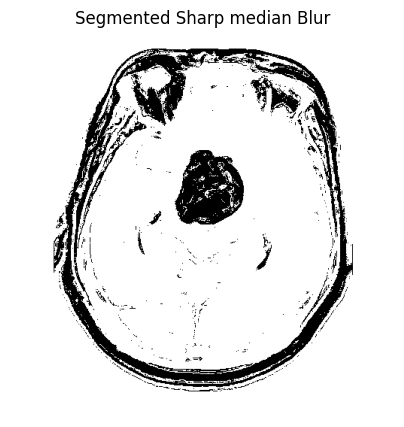

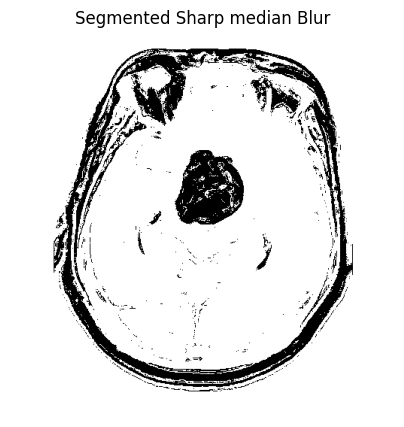

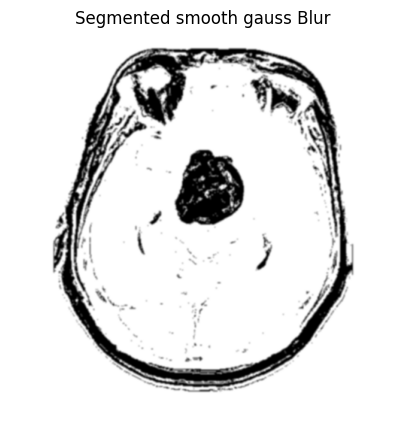

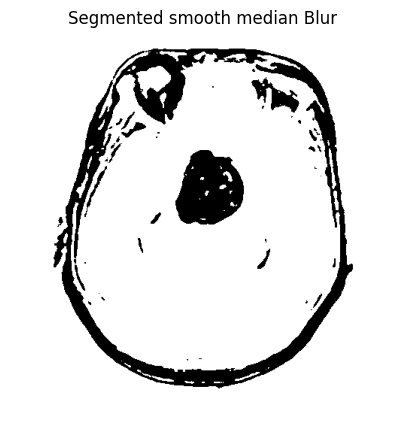

In [22]:
kernel_sharp_strong = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])

sharp_medianMriSeg = cv2.filter2D(th_inv0_0, -1, kernel_sharp_strong)
sharp_gaussianMriSeg = cv2.filter2D(th_inv1_1, -1, kernel_sharp_strong)

smooth_medianMriSeg = cv2.medianBlur(th_inv0_0, 5)
smooth_gaussianMriSeg = cv2.GaussianBlur(th_inv1_1,  (5,5), 0)

plt.figure(figsize=(5,5))
plt.imshow(sharp_medianMriSeg, cmap='gray')
plt.title("Segmented Sharp median Blur")
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(sharp_gaussianMriSeg, cmap='gray')
plt.title("Segmented Sharp median Blur")
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(smooth_gaussianMriSeg, cmap='gray')
plt.title("Segmented smooth gauss Blur")
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(smooth_medianMriSeg, cmap='gray')
plt.title("Segmented smooth median Blur")
plt.axis('off')
plt.show()

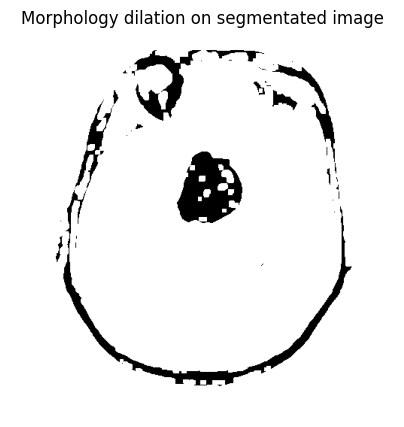

In [37]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(th_inv0_0, cv2.MORPH_CLOSE, kernel)

img_dilate = cv2.dilate(smooth_medianMriSeg, kernel, iterations=2)

plt.figure(figsize=(5,5))
plt.imshow(img_dilate, cmap='gray')
plt.title("Morphology dilation on segmentated image")
plt.axis('off')
plt.show()

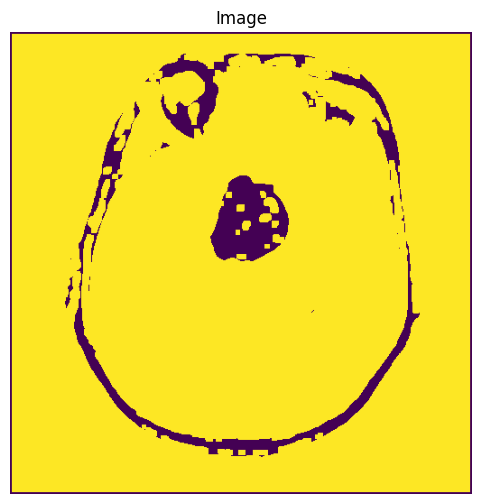

In [38]:
contours, _ = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img_dilate.copy()
cv2.drawContours(output, contours, -1, (0,255,0), 2)

plt.figure(figsize=(6,6))
plt.imshow(output)
plt.title(f"Image")
plt.axis('off')
plt.show()